In [2]:
import matplotlib.pyplot as plt
import cv2
from scipy import stats

In [37]:
# поиск по ключевым точкам, получить peak coord

def matchTemplate(path_img, path_pattern):

    # Load the input images
    input_image = cv2.imread(path_img)
    pattern_template = cv2.imread(path_pattern)

    # тут тодлжен быть свой код
    # необходимо найти ключевые точки и вывести координаты рамки
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(input_image, None) 
    kp2, des2 = sift.detectAndCompute(pattern_template, None) 
    
    bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance) 
    
    points = []
    for m in matches[:15]:
        points.append(kp1[m.queryIdx].pt)
    
    zscores = pd.DataFrame(stats.zscore(points))
    
    true_points = []
    unwanted = np.argwhere(abs(zscores[0]) > 2.5)
    
    for i in range(len(points)): 
        if i not in unwanted:
            true_points.append(points[i])

    #height, width =  input_image.shape
    highlight_start = (int(min(true_points, key=lambda x: x[0])[0]) - 30, 
                       int(min(true_points, key=lambda x: x[1])[1]) - 30)
    highlight_end = (int(max(true_points, key=lambda x: x[0])[0]) + 30, 
                     int(max(true_points, key=lambda x: x[1])[1]) + 30)
    return highlight_start, highlight_end


In [4]:
def show(input_image, pattern_template, highlight_start, highlight_end, row):
    cv2.rectangle(input_image,(row["x1"],row["y1"]), (row["x2"],row["y2"]), 255, 2)
    cv2.rectangle(input_image, highlight_start, highlight_end, (0, 0, 255), 2)
    # Visualize the pattern template and resulting image
    fig_instance, axes_arr = plt.subplots(1, 2, figsize=(10, 5))
    #img_neg = 255 - input_image
    #pat_neg = 255 - pattern_template
    # Show the pattern template
    axes_arr[0].imshow(cv2.cvtColor(pattern_template, cv2.COLOR_BGR2RGB))
    axes_arr[0].set_title('Pattern Template')

    # Show the input image with the highlighted match
    axes_arr[1].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    axes_arr[1].set_title('Pattern Highlighted')

    plt.show()

In [32]:
# iou
def iou(row, highlight_start, highlight_end):
    true_points_set = set()
    pred_points_set= set()

    for x in range(row["x1"], row["x2"]):
        for y in range(row["y1"], row["y2"]):
            true_points_set.add((x,y))

    for x in range(highlight_start[0],highlight_end[0]):
        for y in range(highlight_start[1], highlight_end[1]):
            pred_points_set.add((x,y))
    
    iou_metric = len(true_points_set.intersection(pred_points_set)) / len(true_points_set.union(pred_points_set))
    
    return iou_metric

In [38]:
# загрузка изображений, перебор
import statistics
from PIL import Image, ImageFilter
import numpy as np
import pandas as pd
dataset = pd.read_csv('dataset/annotation.csv', delimiter=';')
dataset.head()
iou_array=[]
for i in range(0,36):
    row = dataset.iloc[i]
    highlight_start, highlight_end = matchTemplate(f"dataset/{row['id']}.jpg", f"dataset/pattern/cropped_img_{row['id']}.jpg")
    iou_metric = iou(row, highlight_start, highlight_end)
    print(f"row{row['id']}:", iou_metric)
    iou_array.append(iou_metric)

iou_mean = statistics.mean(iou_array)
print("iou_mean",iou_mean)

row1: 0.6492391728443231
row2: 0.8667375980848517
row3: 0.7891784066824585
row4: 0.5898290598290599
row5: 0.8658803652427508
row6: 0.2489010989010989
row7: 0.8819154725194993
row8: 0.8640442532267978
row9: 0.1095532283583214
row10: 0.71280276816609
row11: 0.5667020699233772
row13: 0.08715953307392996
row14: 0.7001610866820497
row15: 0.6166388006777607
row16: 0.7977839335180056
row17: 0.459389400921659
row18: 0.43904533695237286
row19: 0.5381445159737681
row20: 0.6667483760264739
row22: 0.9064720568465527
row23: 0.7512934220251294
row24: 0.07212142866595207
row25: 0.6531545545047287
row28: 0.818487518974532
row29: 0.7618014107433533
row30: 0.709836303056642
row31: 0.576771610234748
row32: 0.8194622279129321
row33: 0.8082342123216564
row34: 0.8113413304252999
row35: 0.9126872986976614
row36: 0.7931769722814499
row37: 0.11298986567399084
row38: 0.9275687815833801
row39: 0.536146447409246
row40: 0.0418141592920354
iou_mean 0.6239781688403871


In [19]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

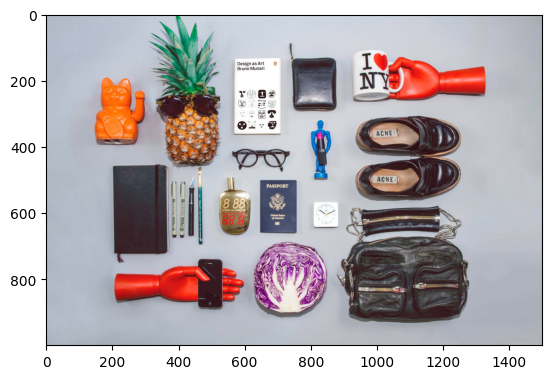

In [20]:
img1 = cv2.imread("dataset/4.jpg")
#plt.axis('off')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

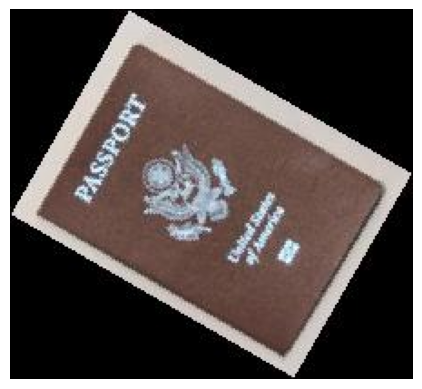

In [21]:
img2 = cv2.imread("dataset/pattern/cropped_img_4.jpg")
plt.axis('off')
plt.imshow(img2)

In [22]:
high_start, high_end = matchTemplate("dataset/4.jpg", "dataset/pattern/cropped_img_4.jpg")

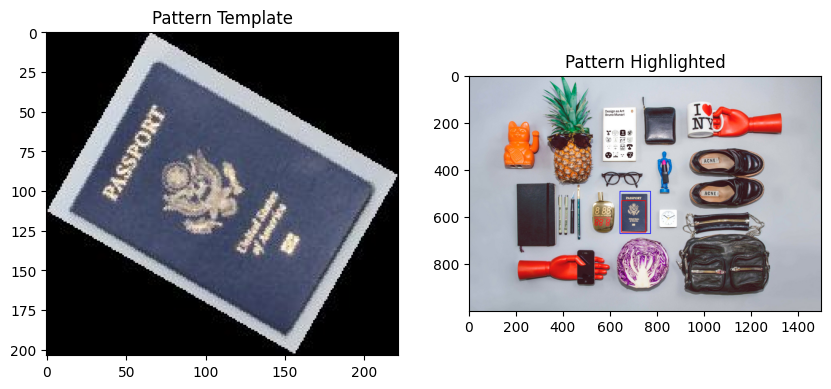

In [23]:
show(img1, img2, high_start, high_end, dataset.iloc[3])

In [24]:
iou(dataset.iloc[3], high_start, high_end)

0.5898290598290599

In [25]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None) 
kp2, des2 = sift.detectAndCompute(img2, None) 

In [28]:
bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance) 

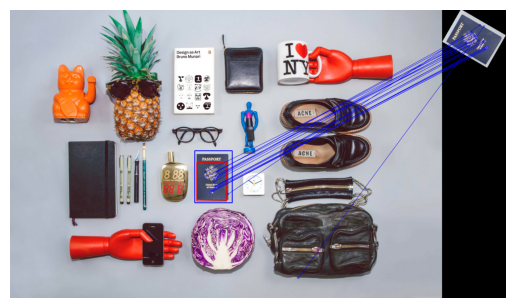

In [30]:
matching_result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, [255,0,0], flags=2)
plt.axis('off')
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))